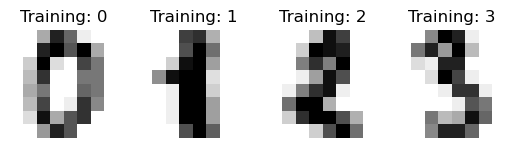

K近鄰演算法進行數字(Digit)影像預測: [2 3 0 4 9 7 0 2 3 1 0 3 0 8 1 9 1 1 8 8 1 7 4 3 7 0 2 1 2 0]
數字(Digit)影像真實值: [2 3 0 4 9 7 0 2 3 1 0 3 0 8 1 9 1 1 8 8 1 7 4 3 7 0 2 1 2 0]
數字(Digits)影像預測準確率 0.99
K近鄰演算法進行IRIS預測: [1 2 0 2 0 1 1 0 2 2 2 2 1 1 0 0 0 2 0 1 2 1 1 1 2 2 1 1 0 1]
IRIS真實值: [1 2 0 2 0 1 1 0 2 1 2 2 1 1 0 0 0 2 0 1 2 2 1 1 2 2 1 1 0 1]
IRIS預測準確率 0.93


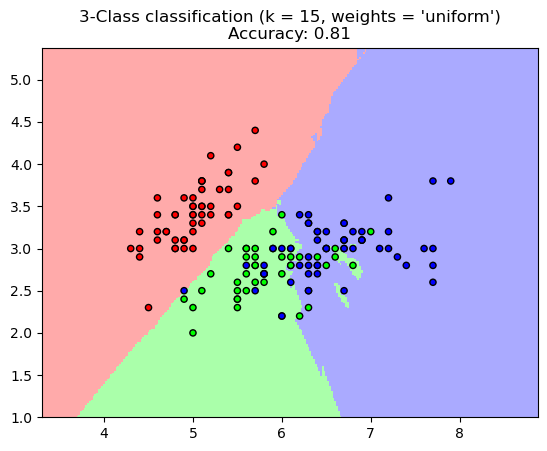

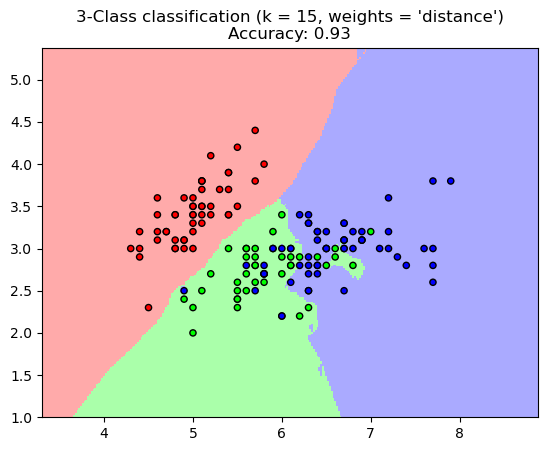

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap #用來繪製分類的決策邊界圖
from sklearn import neighbors
from sklearn.metrics import accuracy_score
#K值預設為5
def load_datasets():
    return datasets.load_digits(),datasets.load_iris()

def KNNImage(data): # 處理多維度資料, digits.images(1797, 8, 8)
    n_samples = len(data.images) # 這行跟下一行是把資料轉成二維
    data_images = data.images.reshape((n_samples, -1))
    knn = KNeighborsClassifier() # 建立空的KNN框架 都沒設定就是都用預設參數
    train_data, test_data, train_label, test_label = train_test_split(data_images, data.target, test_size=0.2)
    clf = knn.fit(train_data,train_label)

    print('K近鄰演算法進行數字(Digit)影像預測:' ,clf.predict(test_data)[:30])
    print('數字(Digit)影像真實值:' ,test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("數字(Digits)影像預測準確率", round(acc, 2))

def KNNValue(data): #處理二維資料, iris.data已經是二維data
    knn = KNeighborsClassifier()
    train_data, test_data, train_label, test_label = train_test_split(data.data, data.target, test_size=0.2)

    clf = knn.fit(train_data,train_label)


    print('K近鄰演算法進行IRIS預測:' ,clf.predict(test_data)[:30])
    print('IRIS真實值:' ,test_label[:30])
    acc = accuracy_score(test_label, clf.predict(test_data))
    print("IRIS預測準確率", round(acc, 2))
    
def show_digits_images(data):
    for i in range(0, 4):
        plt.subplot(2, 4, i + 1)
        plt.axis('off')
        imside = int(np.sqrt(data.data[i].shape[0]))
        im1 = np.reshape(data.data[i], (imside, imside))
        plt.imshow(im1, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: {}'.format(data.target[i]))
    plt.show()

def plot_knn(data):

    n_neighbors = 15 # 設定找15個鄰居

    X = data.data[:, :2] # 為了方便視覺化只抓2個變數(花萼長度、寬度)
    y = data.target

    h = .02  # step size in the mesh，網格間距，決定決策邊界的解析度

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    for weights in ['uniform', 'distance']: # 用迴圈看看這兩個參數跑出來的圖分別、distance距離越近的鄰居影響越大，距離越遠影響越小
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # 參數weights是設定鄰居的加權
        clf.fit(X, y)

        # 計算訓練集準確率
        y_pred = clf.predict(X)
        accuracy = accuracy_score(y, y_pred)  # 計算準確率

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        # 在標題中顯示 K 值、權重模式、準確率
        plt.title("3-Class classification (k = %i, weights = '%s')\nAccuracy: %.2f"
                  % (n_neighbors, weights, accuracy))

    plt.show()

digits,iris = load_datasets()

#print("IRIS 特徵： \n", iris.data )
#print("IRIS 真實值： \n", iris.target )
#print("Digit 特徵： \n", digits.data )
#print("Digit 真實值： \n", digits.target )
show_digits_images(digits)

KNNImage(digits)
KNNValue(iris)
plot_knn(iris)

# https://ithelp.ithome.com.tw/articles/10197110